Objetivo: Classificar se uma pessoa comprou ou não comprou um produto
com base no salário ou na idade

In [104]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Biblioteca ára realizar a normalização dos dados
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC # Importa o algoritmo de SVM

# Biblioteca para gerar as métricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

# Bibliotec para alterar cor dos gráficos
from matplotlib.colors import ListedColormap

In [105]:
df = pd.read_csv("Social_Network_Ads.csv", sep=',')    
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [106]:
colunas = {"User ID":'Usuario','Gender':'Genero', "Age":'Idade', 
           "EstimatedSalary":'Salario Estimado','Purchased':'Comprou'}

In [107]:
df.rename(columns=colunas, inplace=True)
df.head()

,Usuario,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [108]:
X = df.iloc[:, [2, 3]].values # X é a entrada onde pega a idade e a renda dos clientes
Y = df.iloc[:, -1].values # Y é a saida

In [109]:
X # Exibe os valores

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [110]:
from sklearn.model_selection import train_test_split # Library yo divide the data in training and test

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.3, random_state=3)


In [111]:
sc = StandardScaler() # Library to normalize the data

In [112]:
X_treino = sc.fit_transform(X_treino) # Realiza a transformação dos dados
X_teste = sc.fit_transform(X_teste) # Realize the data transform

In [113]:
algoritmo = SVC(kernel='linear', random_state=3) # Kernel is the model svm equation

In [114]:
algoritmo.fit(X_treino, y_treino) # Traning the model wiht the data to enter... 

SVC(kernel='linear', random_state=3)

In [115]:
y_prev = algoritmo.predict(X_teste) # 

In [116]:
# 
algoritmo.predict(X_teste) # Generating forecast 

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [117]:
x_test_padrao = sc.inverse_transform(X_teste)

In [118]:
cm = confusion_matrix(y_teste, y_prev)
cm

array([[72,  6],
       [13, 29]], dtype=int64)

In [119]:
import seaborn as sns # importa a biblioteca se seaborn para plotar a matriz de confusão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Usuario           400 non-null    int64 
 1   Genero            400 non-null    object
 2   Idade             400 non-null    int64 
 3   Salario Estimado  400 non-null    int64 
 4   Comprou           400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


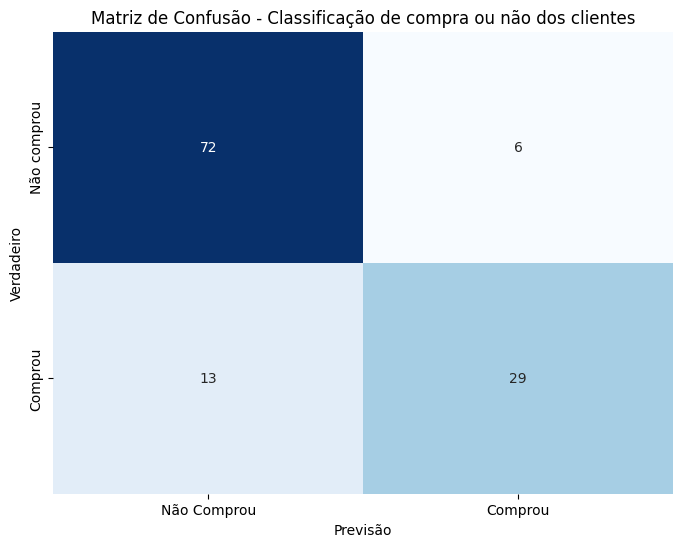

In [120]:
plt.figure(figsize=(8, 6))
print(df.info())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Não Comprou', 'Comprou'], yticklabels=['Não comprou', 'Comprou'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de compra ou não dos clientes')
plt.show()

In [121]:
# Taixa de acertos, Ver_positivo + Ver_nagativo / total
acc = accuracy_score(y_teste, y_prev) 
acc

0.8416666666666667

In [122]:
# Ver_positivo / Ver_positivo + Fal_negativo
prec = precision_score(y_teste, y_prev) 
prec

0.8285714285714286

In [123]:
# F1_score é a métrica mais completa para avaliar um modelo de machine
# learning pois leva em consideração além dos verdadeiros positivos e 
# verdadeiros negativos. os falso positivos e falso negativo

f1 = f1_score(y_teste, y_prev)
f1

0.7532467532467533

C:\Users\47341687843\AppData\Local\Temp\ipykernel_19780\1855831098.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


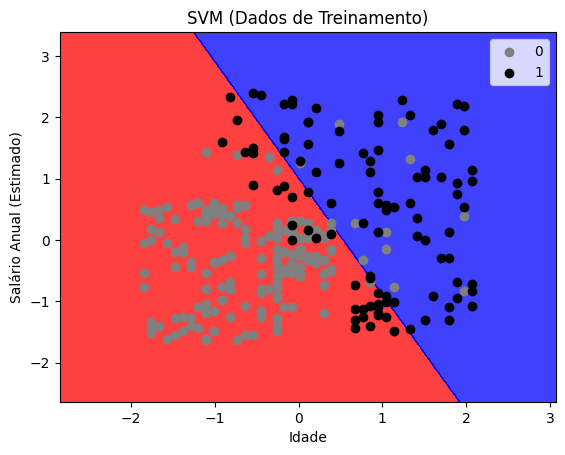

In [124]:
_X, _y = X_treino, y_treino
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

C:\Users\47341687843\AppData\Local\Temp\ipykernel_19780\785051974.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


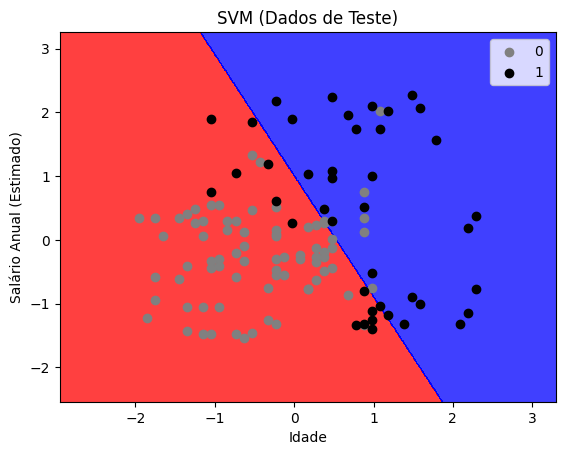

In [125]:
# Visualizando os resultados dos dados de teste:
_X, _y = X_teste,y_teste
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

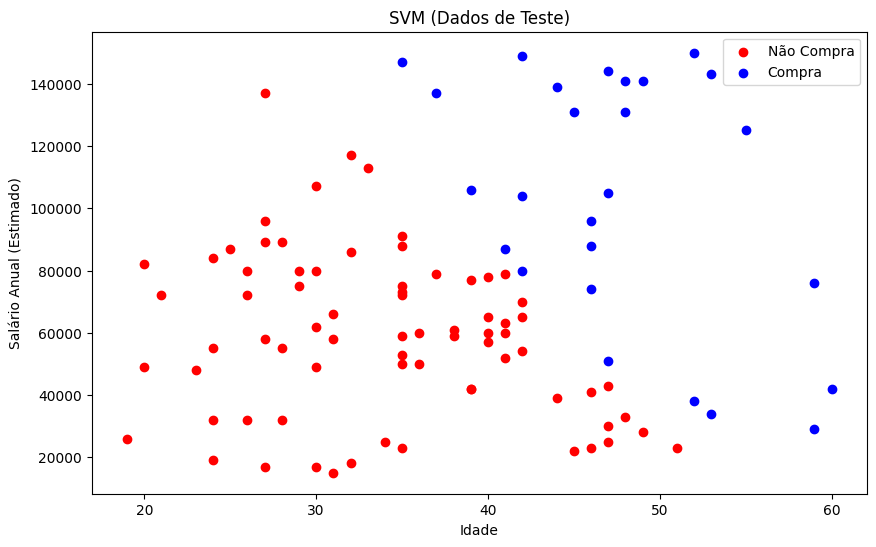

In [126]:
#Aplicando transformação nos dados
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

# Divisão da amostra
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=3)

# Padronização dos dados
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

# Treinamento do modelo SVM
algoritmo = SVC(kernel='linear', random_state=3)
algoritmo.fit(X_treino, y_treino)

# Previsão dos resultados
y_prev = algoritmo.predict(X_teste)

# Inversão da escala para os dados de teste
X_teste_inverse = sc.inverse_transform(X_teste)

# Visualização dos resultados dos dados de teste
plt.figure(figsize=(10, 6))

# Pontos para as duas classes
plt.scatter(X_teste_inverse[y_prev == 0, 0], X_teste_inverse[y_prev == 0, 1], c='red', label='Não Compra')
plt.scatter(X_teste_inverse[y_prev == 1, 0], X_teste_inverse[y_prev == 1, 1], c='blue', label='Compra')

plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()